In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
import platform
from matplotlib import font_manager, rc

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
고객 = pd.read_csv('../data/고객.csv', encoding='euc-kr')
고객

,Unnamed: 0,고객ID,월요일빈도수,화요일빈도수,수요일빈도수,목요일빈도수,금요일빈도수,토요일빈도수,일요일빈도수,자정(0~3),...,아침식사,통조림,"유제품,계란",가정용품,아기용품,간식,델리,누락,군집,가격
0,0,1,3,2,2,4,0,0,0,0,...,4,0,17,3,0,25,0,0,0,681.65
1,1,2,6,5,2,1,1,0,0,0,...,3,4,49,0,0,47,24,0,1,1647.29
2,2,3,2,1,3,0,0,0,6,0,...,0,0,21,1,0,9,2,0,0,488.82
3,3,4,0,0,0,2,2,1,0,0,...,0,1,0,2,0,1,2,0,0,205.68
4,4,5,1,0,2,0,0,0,2,0,...,0,1,9,1,0,1,1,0,0,278.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206204,206205,1,1,0,1,1,0,0,0,...,0,0,20,0,1,0,5,2,0,372.68
206205,206205,206206,8,7,11,12,3,8,18,0,...,1,9,39,12,0,42,5,0,1,2154.38
206206,206206,206207,3,3,2,1,2,2,3,0,...,4,11,52,0,1,23,8,0,1,1591.25
206207,206207,206208,10,12,7,5,5,5,5,0,...,17,11,161,6,3,59,28,2,2,4768.37


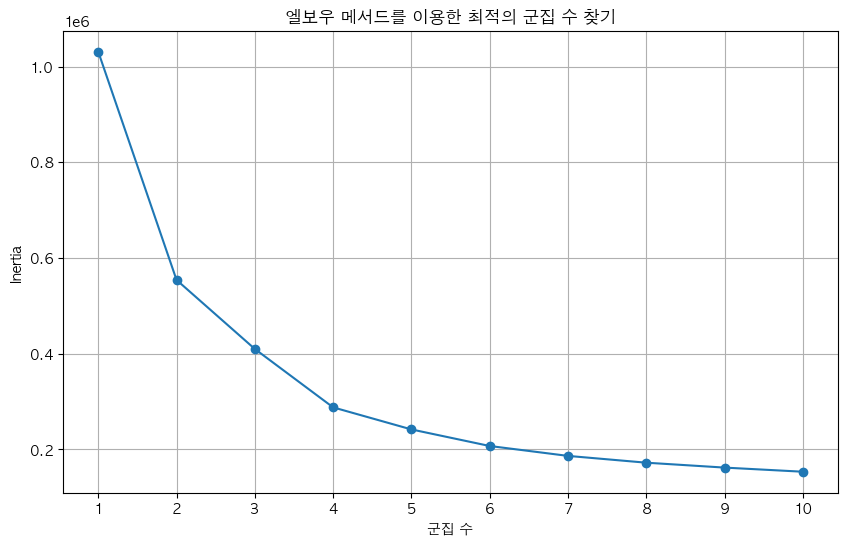

In [9]:
# 사용할 열 선택
X = 고객[['총주문횟수', '마지막주문(경과일수)', '사용날짜', '제품수', '가격']]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 엘보우 메서드 위한 리스트 초기화
inertia = []

# 1부터 10까지의 군집 개수에 대해 KMeans를 실행하고 inertia 값 저장
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('엘보우 메서드를 이용한 최적의 군집 수 찾기')
plt.xlabel('군집 수')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

,Unnamed: 0,고객ID,월요일빈도수,화요일빈도수,수요일빈도수,목요일빈도수,금요일빈도수,토요일빈도수,일요일빈도수,자정(0~3),...,아침식사,통조림,"유제품,계란",가정용품,아기용품,간식,델리,누락,군집,가격
0,0,1,3,2,2,4,0,0,0,0,...,4,0,17,3,0,25,0,0,0,681.65
1,1,2,6,5,2,1,1,0,0,0,...,3,4,49,0,0,47,24,0,3,1647.29
2,2,3,2,1,3,0,0,0,6,0,...,0,0,21,1,0,9,2,0,0,488.82
3,3,4,0,0,0,2,2,1,0,0,...,0,1,0,2,0,1,2,0,3,205.68
4,4,5,1,0,2,0,0,0,2,0,...,0,1,9,1,0,1,1,0,0,278.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206204,206205,1,1,0,1,1,0,0,0,...,0,0,20,0,1,0,5,2,0,372.68
206205,206205,206206,8,7,11,12,3,8,18,0,...,1,9,39,12,0,42,5,0,1,2154.38
206206,206206,206207,3,3,2,1,2,2,3,0,...,4,11,52,0,1,23,8,0,1,1591.25
206207,206207,206208,10,12,7,5,5,5,5,0,...,17,11,161,6,3,59,28,2,2,4768.37


/Users/seosangtae/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


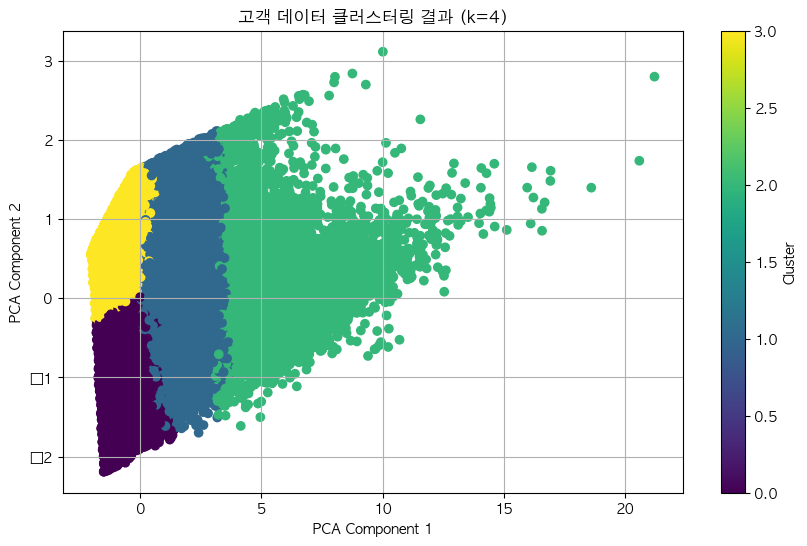

In [10]:
# 사용할 열 선택
X = 고객[['총주문횟수', '마지막주문(경과일수)', '사용날짜', '제품수', '가격']]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# 클러스터 할당 결과를 데이터프레임에 추가
고객['군집'] = kmeans.labels_

# 결과 출력
display(고객)

# 클러스터링 결과 시각화 (2D 시각화를 위해 PCA 사용)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=고객['군집'], cmap='viridis', marker='o')
plt.title('고객 데이터 클러스터링 결과 (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

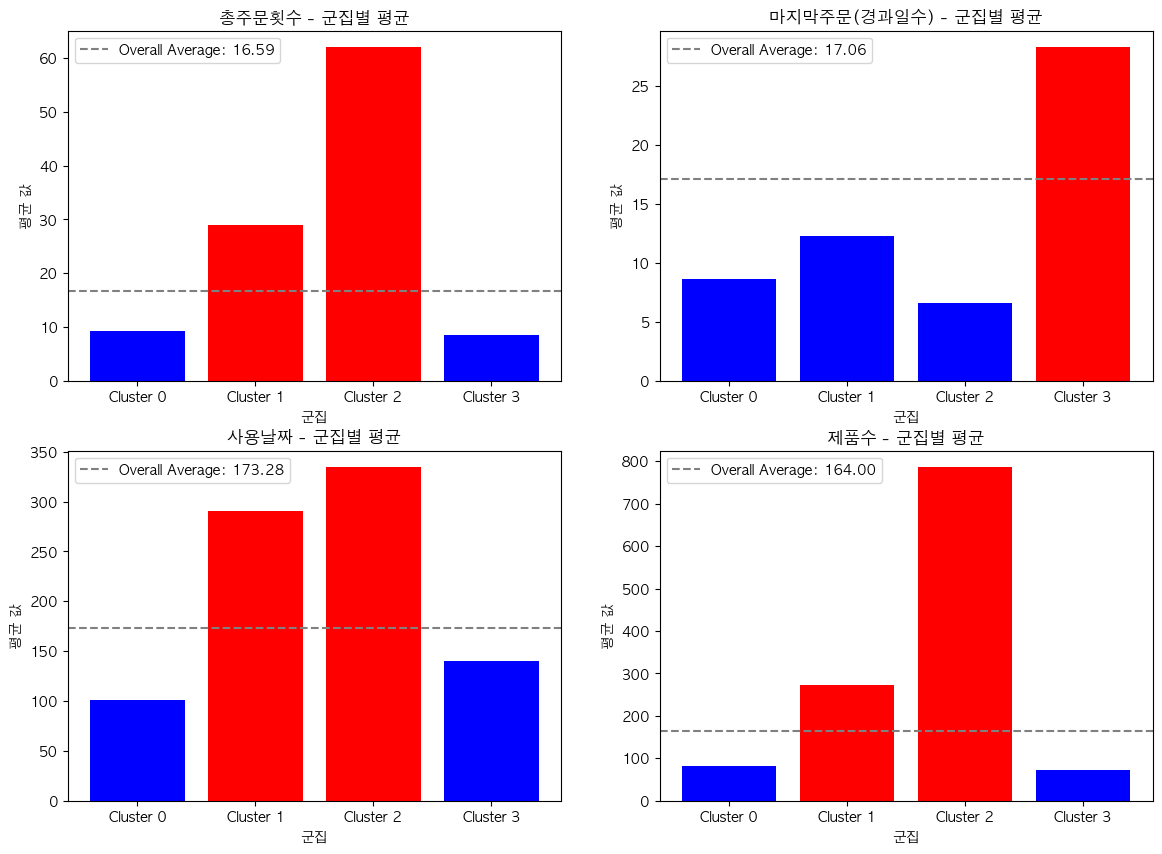

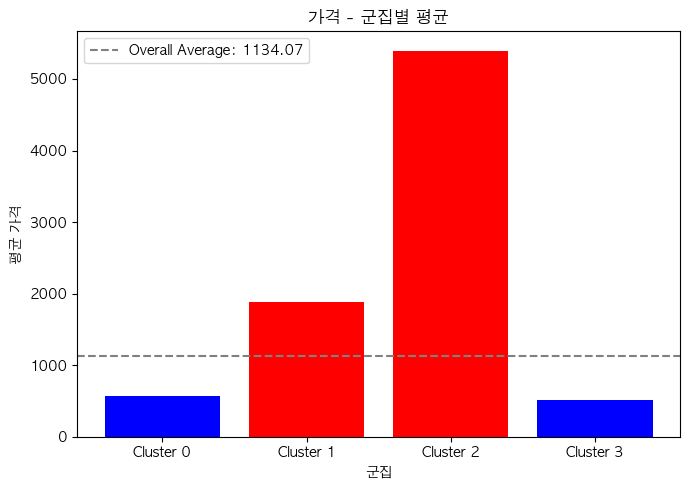

In [6]:
# 군집별 평균 계산
cluster_means = 고객.groupby('군집').mean()

# 전체 평균 계산
overall_means = 고객[['총주문횟수', '마지막주문(경과일수)', '사용날짜', '제품수', '가격']].mean()

# 군집 번호 라벨 생성 (군집의 개수에 맞게 동적으로 생성)
cluster_labels = [f'Cluster {i}' for i in cluster_means.index]

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 각 지표별 시각화
for ax, col in zip(axes.flatten(), ['총주문횟수', '마지막주문(경과일수)', '사용날짜', '제품수']):
    # 군집별 평균과 전체 평균 비교
    means = cluster_means[col]
    avg_line = overall_means[col]
    
    # 이상/이하 색상
    colors = ['red' if value > avg_line else 'blue' for value in means]
    
    # 막대 그래프 그리기
    bars = ax.bar(cluster_means.index, means, tick_label=cluster_labels, color=colors)
    ax.axhline(avg_line, color='gray', linestyle='--', label=f'Overall Average: {avg_line:.2f}')
    ax.set_title(f'{col} - 군집별 평균')
    ax.set_xlabel('군집')
    ax.set_ylabel('평균 값')
    ax.legend()

# '가격' 열이 없거나, 평균을 구할 수 없는 경우를 대비하여 예외 처리
if '가격' in cluster_means.columns:
    fig, ax = plt.subplots(figsize=(7, 5))
    means = cluster_means['가격']
    avg_line = overall_means['가격']
    
    # 이상/이하 색상
    colors = ['red' if value > avg_line else 'blue' for value in means]
    
    # 막대 그래프 그리기
    bars = ax.bar(cluster_means.index, means, tick_label=cluster_labels, color=colors)
    ax.axhline(avg_line, color='gray', linestyle='--', label=f'Overall Average: {avg_line:.2f}')
    ax.set_title('가격 - 군집별 평균')
    ax.set_xlabel('군집')
    ax.set_ylabel('평균 가격')
    ax.legend()

plt.tight_layout()
plt.show()

In [11]:
고객.to_csv('../data/고객.csv', encoding='cp949')